In [150]:
from pyforest import *

In [151]:
df = pd.read_csv('problem2.csv')

<IPython.core.display.Javascript object>

In [152]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [153]:
df.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [154]:
# Drop the first column
df = df.drop(df.columns[0], axis=1)
df

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,Wed,PM,Strength,0
1,10,79.01,2,Mon,AM,HIIT,0
2,16,74.53,14,Sun,AM,Strength,0
3,5,86.12,10,Fri,AM,Cycling,0
4,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...
1495,21,79.51,10,Fri,AM,HIIT,0
1496,29,89.55,2,Mon,AM,Strength,0
1497,9,87.38,4,Tue,AM,HIIT,0
1498,34,68.64,14,Sun,AM,Aqua,0


In [155]:
# Checking for missing values
df.isnull().sum()

months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [156]:
df['attended'].value_counts()

attended
0    1046
1     454
Name: count, dtype: int64

In [157]:
# Fillin missing values in weight column with the median
df['weight'] = df['weight'].fillna(df['weight'].median())


In [158]:
df['days_before'].value_counts()

days_before
10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: count, dtype: int64

In [159]:
# Removing days in day_before column
df['days_before'] = df['days_before'].str.replace('days', '').str.strip()

df['days_before'] = df['days_before'].astype(int)

df['days_before'].value_counts()


days_before
10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: count, dtype: int64

In [160]:
df['category'].value_counts()


category
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: count, dtype: int64

In [161]:
# Changing - to Other in category column
df['category'] = df['category'].replace('-', 'Other')


In [162]:
df['day_of_week'].value_counts()

day_of_week
Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: count, dtype: int64

In [163]:
# Renaming Fri. to Fri, Monday to Mon, Wednesday to Wed
df['day_of_week'] = df['day_of_week'].replace({'Fri.': 'Fri', 'Monday': 'Mon', 'Wednesday': 'Wed'})

df['day_of_week'].value_counts()

day_of_week
Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

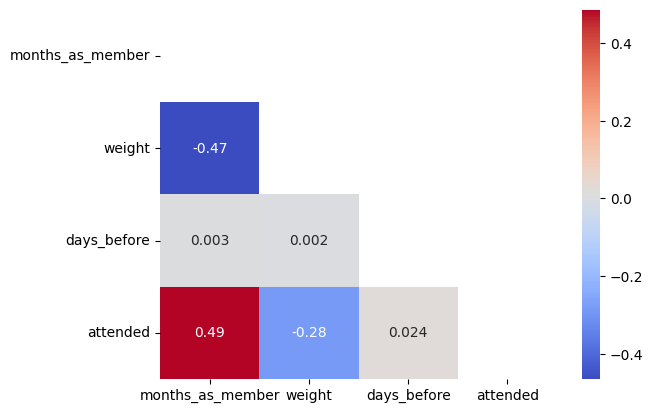

In [164]:
# Correlation matrix
numerical_columns = df.columns[df.dtypes != 'object']

corr = df[numerical_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.show()



In [165]:
df_attended = df[df['attended'] == 1]
df_not_attended = df[df['attended'] == 0]

df_not_attended.describe()

,months_as_member,weight,days_before,attended
count,1046.000000,1046.000000,1046.000000,1046.0
mean,11.495220,84.951597,8.282027,0.0
std,7.171546,12.889956,4.075813,0.0
min,1.000000,55.410000,1.000000,0.0
25%,7.000000,75.800000,4.000000,0.0
50%,10.000000,82.645000,9.000000,0.0
75%,14.000000,91.890000,12.000000,0.0
max,57.000000,170.520000,29.000000,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

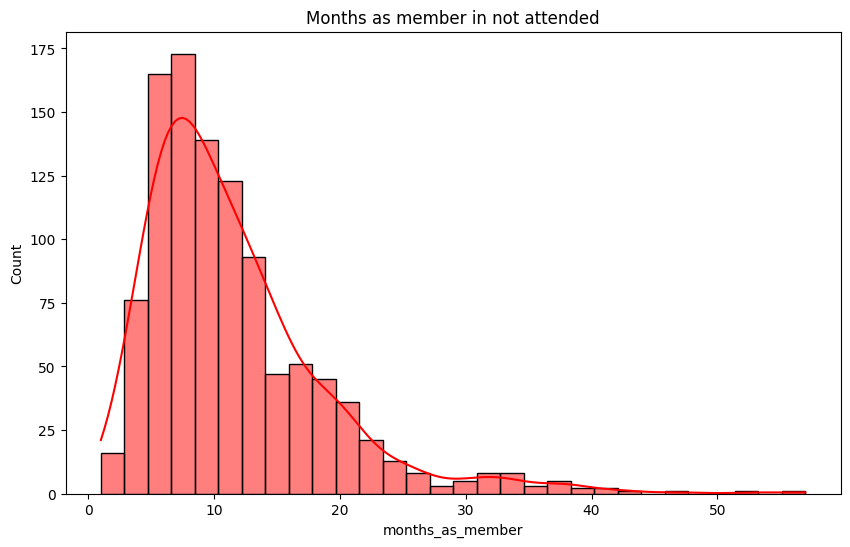

In [166]:
# Visualizing Months_as_member in not attended 
plt.figure(figsize=(10, 6))
sns.histplot(data=df_not_attended, x='months_as_member', bins=30, kde=True, color='red')
plt.title('Months as member in not attended')
plt.show()


In [167]:
# Creating piechart of not attended with time using plotly
import plotly.express as px
theme = 'plotly_dark'
colors = ['green', 'yellow']

fig = px.pie(df_not_attended, names='time', title='Not attended with time', color_discrete_sequence=colors)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Not attended with time', template=theme)
fig.show()

In [168]:
df_not__AM = df_not_attended[df_not_attended['time'] == 'AM']
df_not__PM = df_not_attended[df_not_attended['time'] == 'PM']

df_not__AM.describe()

,months_as_member,weight,days_before,attended
count,781.000000,781.000000,781.000000,781.0
mean,11.541613,85.080704,8.391805,0.0
std,7.291890,13.116867,4.055403,0.0
min,1.000000,55.410000,2.000000,0.0
25%,6.000000,75.820000,4.000000,0.0
50%,10.000000,82.790000,10.000000,0.0
75%,15.000000,91.740000,12.000000,0.0
max,57.000000,170.520000,15.000000,0.0


In [169]:
df['category'].value_counts()

category
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
Other        13
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_40656/2728201380.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

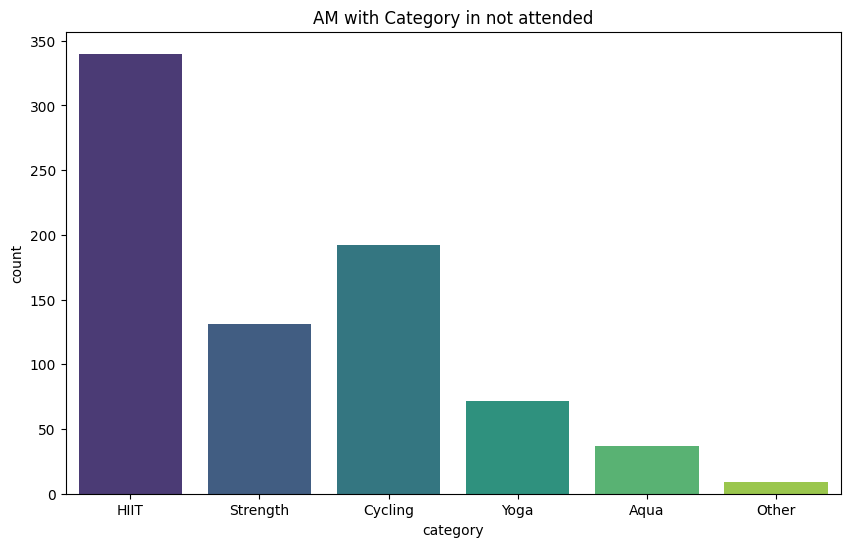

In [170]:
# Visualizing AM with Category in not attended
plt.figure(figsize=(10, 6))
sns.countplot(data=df_not__AM, x='category', palette='viridis')
plt.title('AM with Category in not attended')
plt.show()


Out of all the Persons not attending Category HIIT has the highest number maybe due to high intensity workout. If person next in the line wants to attend this class he/she can be given a seat

In [207]:
# Getting value counts of category that attended  with time from original dataframe
df_attended_AM = df_attended[df_attended['time'] == 'AM']
df_attended_PM = df_attended[df_attended['time'] == 'PM']

df_attended_AM['category'].value_counts()


category
HIIT        165
Cycling      87
Strength     50
Yoga         37
Aqua         19
Other         2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

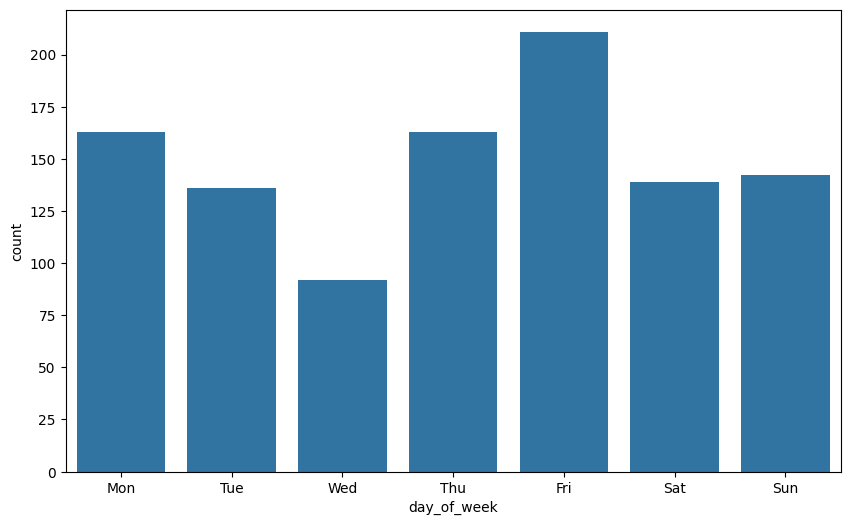

In [171]:
# Visualizing day of the week in not attended in arranged order
plt.figure(figsize=(10, 6))
sns.countplot(data=df_not_attended , x='day_of_week', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

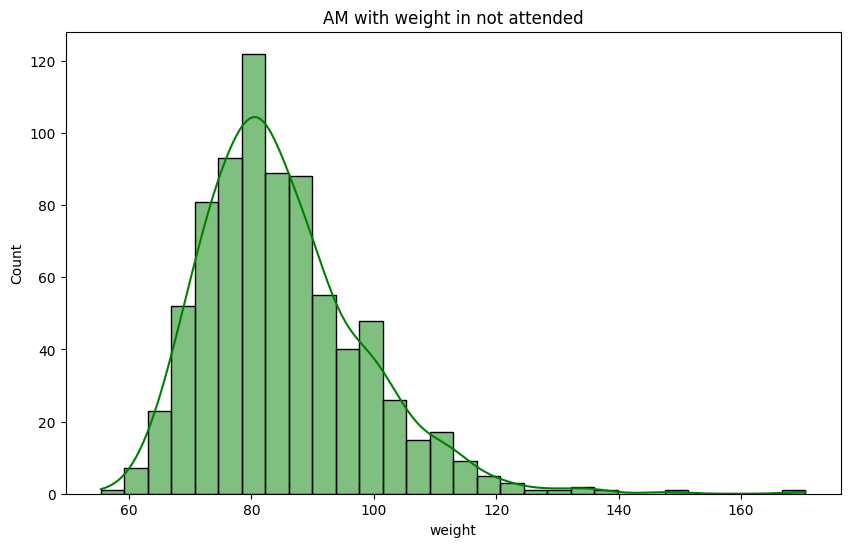

In [172]:
# Visualizing the AM with weight in not attended
plt.figure(figsize=(10, 6))
sns.histplot(data=df_not__AM, x='weight', bins=30, kde=True, color='green')
plt.title('AM with weight in not attended')
plt.show()


In [173]:
df

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,Wed,PM,Strength,0
1,10,79.01,2,Mon,AM,HIIT,0
2,16,74.53,14,Sun,AM,Strength,0
3,5,86.12,10,Fri,AM,Cycling,0
4,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...
1495,21,79.51,10,Fri,AM,HIIT,0
1496,29,89.55,2,Mon,AM,Strength,0
1497,9,87.38,4,Tue,AM,HIIT,0
1498,34,68.64,14,Sun,AM,Aqua,0


In [174]:
# Upsampling the majority class and downsampling the minority class
from sklearn.utils import resample

df_minority = df[df['attended'] == 1]
df_majority = df[df['attended'] == 0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=600, random_state=42)
df_majority_downsampled = resample(df_majority, replace=False, n_samples=900, random_state=42)


# Concatenating the upsampled and downsampled dataframes
df = pd.concat([df_minority_upsampled, df_majority_downsampled])


<IPython.core.display.Javascript object>

In [175]:
df['attended'].value_counts()

attended
0    900
1    600
Name: count, dtype: int64

In [176]:
# Creating a model to predict the attendance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Encoding the categorical columns
df = pd.get_dummies(df, columns=['day_of_week', 'time', 'category'], drop_first=False)

<IPython.core.display.Javascript object>

In [177]:
df

,months_as_member,weight,days_before,attended,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Other,category_Strength,category_Yoga
343,23,74.94,12,1,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False
1445,17,70.46,10,1,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1168,12,80.08,10,1,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False
909,27,62.32,8,1,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
356,18,73.05,2,1,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,10,75.94,4,0,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False
914,8,84.11,6,0,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False
1365,9,76.94,12,0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
870,13,75.62,7,0,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False


In [178]:
X = df.drop('attended', axis=1)
y = df['attended']

# Splitting the data into training and testing and validating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for s in solver:
    model = LogisticRegression(solver=s)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Solver: {s}')
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    print('\n')


Solver: newton-cg
[[235  35]
 [ 68 112]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       270
           1       0.76      0.62      0.69       180

    accuracy                           0.77       450
   macro avg       0.77      0.75      0.75       450
weighted avg       0.77      0.77      0.77       450





Solver: lbfgs
[[233  37]
 [ 68 112]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       270
           1       0.75      0.62      0.68       180

    accuracy                           0.77       450
   macro avg       0.76      0.74      0.75       450
weighted avg       0.77      0.77      0.76       450



Solver: liblinear
[[234  36]
 [ 70 110]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       270
           1       0.75      0.61      0.67       180

    accuracy                           0.76       450
   macro avg       0.76      0.74      0.75       450
weighted avg       0.76      0.76      0.76       450



Solver: sag
[[232  38]
 [ 69 111]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       270
           1       0.74      0.62      0.67       180

    accuracy                           0.76       450
   macro av

/Users/aerishgaba/Desktop/AI:ML/Workspace/Personal/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/aerishgaba/Desktop/AI:ML/Workspace/Personal/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/aerishgaba/Desktop/AI:ML/Workspace/Personal/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [179]:
# Using the best solver
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[235  35]
 [ 68 112]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       270
           1       0.76      0.62      0.69       180

    accuracy                           0.77       450
   macro avg       0.77      0.75      0.75       450
weighted avg       0.77      0.77      0.77       450



In [180]:
# Saving the model
import joblib

joblib.dump(model, 'model.pkl')


['model.pkl']

In [181]:
X_train.shape

(1050, 18)

In [182]:
df

,months_as_member,weight,days_before,attended,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Other,category_Strength,category_Yoga
343,23,74.94,12,1,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False
1445,17,70.46,10,1,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1168,12,80.08,10,1,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False
909,27,62.32,8,1,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
356,18,73.05,2,1,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,10,75.94,4,0,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False
914,8,84.11,6,0,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False
1365,9,76.94,12,0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
870,13,75.62,7,0,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False


In [202]:
X_test

,months_as_member,weight,days_before,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Other,category_Strength,category_Yoga
1207,23,75.49,10,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1457,12,82.03,4,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False
64,2,107.03,2,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1135,26,74.59,12,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False
1019,11,68.87,10,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,9,73.07,8,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
67,8,72.63,14,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
196,15,79.02,12,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False
1481,8,96.91,8,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False


In [183]:
# getting the probability of the model
prob = model.predict_proba(X_test)
prob

array([[4.03652671e-01, 5.96347329e-01],
       [6.63001016e-01, 3.36998984e-01],
       [9.14394654e-01, 8.56053464e-02],
       [3.98786347e-01, 6.01213653e-01],
       [8.35136158e-01, 1.64863842e-01],
       [6.32918890e-01, 3.67081110e-01],
       [7.78538435e-01, 2.21461565e-01],
       [7.94752850e-01, 2.05247150e-01],
       [1.12298871e-01, 8.87701129e-01],
       [7.74883482e-01, 2.25116518e-01],
       [8.34363971e-01, 1.65636029e-01],
       [6.24143816e-01, 3.75856184e-01],
       [6.89628812e-01, 3.10371188e-01],
       [4.76646511e-01, 5.23353489e-01],
       [6.09351295e-01, 3.90648705e-01],
       [5.14783455e-01, 4.85216545e-01],
       [8.99244803e-01, 1.00755197e-01],
       [2.13763981e-01, 7.86236019e-01],
       [7.26689826e-01, 2.73310174e-01],
       [7.74068003e-01, 2.25931997e-01],
       [3.71860306e-01, 6.28139694e-01],
       [8.04731324e-01, 1.95268676e-01],
       [5.34691158e-01, 4.65308842e-01],
       [1.36294042e-02, 9.86370596e-01],
       [6.070984

In [205]:
# Getting maximum probability instance from original dataframe
max_prob = prob.max()
max_prob

# Getting the index of the maximum probability
index = np.where(prob == max_prob)
index

# Getting the instance with the maximum probability
instance = df.iloc[index[0]]
instance


<IPython.core.display.Javascript object>

,months_as_member,weight,days_before,attended,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Other,category_Strength,category_Yoga
1370,11,84.58,14,1,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False


In [229]:
import tkinter as tk
from tkinter import messagebox
import joblib
from PIL import ImageTk, Image

# Load the saved model
model = joblib.load('model.pkl')  

# Function to predict attendance probability
def predict_probability():
    # Get the input values from the GUI widgets
    months_as_member = float(entry_months.get())
    weight = float(entry_weight.get())
    days_before = float(entry_days_before.get())
    # Get the selected values from dropdown menus
    selected_day_of_week = day_of_week_var.get()
    selected_time = time_var.get()
    selected_category = category_var.get()

    # Encode the selected values
    day_of_week_encoded = [0] * 7
    time_encoded = [0] * 2
    category_encoded = [0] * 6

    if selected_day_of_week in day_of_week_options:
        day_of_week_encoded[day_of_week_options.index(selected_day_of_week)] = 1

    if selected_time in time_options:
        time_encoded[time_options.index(selected_time)] = 1

    if selected_category in category_options:
        category_encoded[category_options.index(selected_category)] = 1
    
    # Combine all input features
    input_features = [months_as_member, weight, days_before] + day_of_week_encoded + time_encoded + category_encoded
    
    # Predict the probability of attendance
    probability = model.predict_proba([input_features])[0][1]
    
    # Display the predicted probability
    messagebox.showinfo("Prediction", f"Probability of attendance: {probability:.2f}")
    if probability > 0.8:
        emoji = "😁"
        messagebox.showinfo("Prediction", "The person will hit it" + emoji)
    elif 0.8 >= probability > 0.5:
        emoji = "😃"
        messagebox.showinfo("Prediction", "The person is likely to hit it" + emoji)
    elif 0.5 >= probability >= 0.4:
        emoji = "😐"
        messagebox.showinfo("Prediction", "The person may or may not hit it" + emoji)
    else:
        emoji = "😒"
        messagebox.showinfo("Prediction", "The person is a no show" + emoji)

# Create the GUI window
window = tk.Tk()
window.title("Gym Attendance Predictor")

# Add image background
bg_image = Image.open("logo.jpg")  
bg_photo = ImageTk.PhotoImage(bg_image)
background_label = tk.Label(window, image=bg_photo)
background_label.place(relwidth=1, relheight=1)

# Create input fields and labels for each feature
tk.Label(window, text="Months as Member:").grid(row=0, column=0)
entry_months = tk.Entry(window)
entry_months.grid(row=0, column=1)

tk.Label(window, text="Weight:").grid(row=1, column=0)
entry_weight = tk.Entry(window)
entry_weight.grid(row=1, column=1)

tk.Label(window, text="Days Before:").grid(row=2, column=0)
entry_days_before = tk.Entry(window)
entry_days_before.grid(row=2, column=1)

# Dropdown menus for categorical features
day_of_week_options = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_of_week_var = tk.StringVar(window)
day_of_week_var.set(day_of_week_options[0])
tk.Label(window, text="Day of Week:").grid(row=3, column=0)
day_of_week_menu = tk.OptionMenu(window, day_of_week_var, *day_of_week_options)
day_of_week_menu.grid(row=3, column=1)

time_options = ['AM', 'PM']
time_var = tk.StringVar(window)
time_var.set(time_options[0])
tk.Label(window, text="Time:").grid(row=4, column=0)
time_menu = tk.OptionMenu(window, time_var, *time_options)
time_menu.grid(row=4, column=1)

category_options = ['HIIT','Cycling','Strength','Yoga', 'Aqua', 'Other']
category_var = tk.StringVar(window)
category_var.set(category_options[0])
tk.Label(window, text="Category:").grid(row=5, column=0)
category_menu = tk.OptionMenu(window, category_var, *category_options)
category_menu.grid(row=5, column=1)

# Button to predict attendance probability
predict_button = tk.Button(window, text="Predict", command=predict_probability)
predict_button.grid(row=6, column=0, columnspan=2)

# Start the GUI event loop
window.mainloop()


/Users/aerishgaba/Desktop/AI:ML/Workspace/Personal/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

